# Position of a quasar - Heteoscedastic scenario

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). 
Let's assume that each measurment has a $\sigma_{i}$that is normally distribured with mean $0.2$ and standard deviation $0.5$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.stats import norm

Generate fake measurements.

In [3]:
N = 5
mu, sigma = 1, 0.2
np.random.seed(0)
means = norm(mu, sigma).rvs(N)
variances = norm(0.2, 0.05).rvs(N)
print(means)
print(variances)

[1.35281047 1.08003144 1.1957476  1.44817864 1.3735116 ]
[0.15113611 0.24750442 0.19243214 0.19483906 0.22052993]


Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_{i} | \mu, \sigma)$.

Plot each of the individual likelihoods separately. 

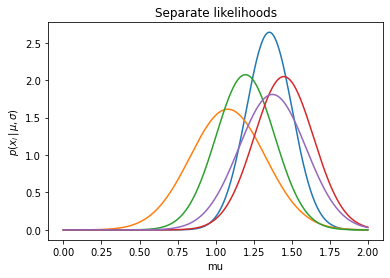

In [4]:
M = 1000
x = np.linspace(0, 2, M)

likelihood = np.array([norm(loc=i, scale=j).pdf(x) for i,j in zip(means,variances)])

for l in likelihood:
    plt.plot(x, l)
    plt.xlabel('mu')
    plt.ylabel('$p(x_{i} \, | \, \mu , \sigma)$')
    plt.title('Separate likelihoods')
    
plt.show()

Also plot their product (i.e. the likelihood of the dataset $x_{i}$).

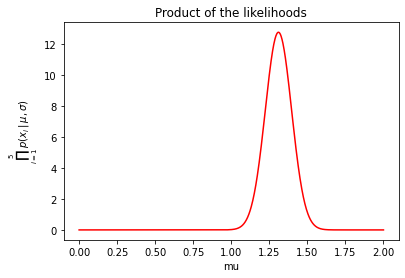

In [5]:
prod_l = np.prod(likelihood, axis=0)
plt.plot(x, prod_l, color='red')
plt.xlabel('mu')
plt.ylabel('$ \prod_{i=1}^{5} \, p(x_{i} \, | \, \mu , \sigma)$')
plt.title('Product of the likelihoods')
    
plt.show()

Let's put all togheter

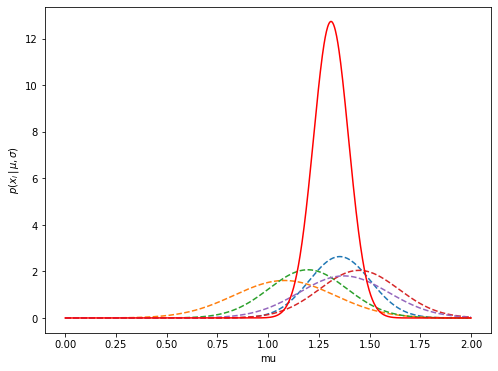

In [6]:
plt.figure(figsize=(8,6))

for l in likelihood:
    plt.plot(x, l, linestyle='dashed')
    plt.xlabel('mu')
    plt.ylabel('$p(x_{i} \, | \, \mu , \sigma)$')
    
plt.plot(x, prod_l, color='red')
plt.show()

I read the maximum likelihood solution

Compare it with the MLE estimator derived above

In [7]:
max_l_sol = np.argmax(prod_l)
best_mu = x[max_l_sol]
sample_mean = np.average(means, weights=1/(variances)**2)
print('The sample mean is', sample_mean)
print('The maximum likelihood solution results to be', best_mu, 'which is consistent to the MLE')

The sample mean is 1.3098548419842548
The maximum likelihood solution results to be 1.3093093093093093 which is consistent to the MLE


Check the Fisher matrix error estimate makes sense

Do a rough $2^{nd}$ order differentation of our log-likelihood function with $\textbf{np.diff}$, divide through by our $\delta\theta^2$ to get the correct normalization, multiply by $-1$, then take the square root.
Compare with the Fisher matrix error derived above.

In [8]:
lnL = np.log(prod_l)
sigma_mu = np.mean(np.diff(lnL, n=2))
sigma_mu = sigma_mu / (x[1]-x[0])**2  # i divide by the interval of my x's
sigma_mu = sigma_mu * (-1)
sigma_mu = 1/np.sqrt(sigma_mu)
print('Rough computation of the variance estimator =', sigma_mu)
fm_error = sigma / np.sqrt(N)
print('Variance estimator through the Fisher matrix derivation =', fm_error)

Rough computation of the variance estimator = 0.08638296814963022
Variance estimator through the Fisher matrix derivation = 0.08944271909999159


Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution.

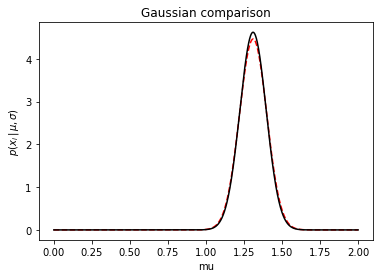

In [9]:
plt.plot(x, norm(loc=sample_mean, scale=fm_error).pdf(x), color='red', linestyle='dashed')
plt.plot(x, norm(loc=best_mu, scale=sigma_mu).pdf(x), color='black')
plt.xlabel('mu')
plt.ylabel('$ p(x_{i} \, | \, \mu , \sigma)$')
plt.title('Gaussian comparison')
plt.show()